In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = (SparkSession
 .builder
 .appName("<app_name>")
 .getOrCreate())

In [ ]:
file_path1 = "/content/ipl_ball_by_ball.csv"

# Read in the airports data
df = spark.read.csv(file_path1, header=True)

# Show the data
df.show()

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|        bowling_team|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...|      Mumbai Indians|
|  419157|     2|   16|   5|      V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|        

In [ ]:
file_path2 = "/content/ipl_matches.csv"

# Read in the airports data
df2 = spark.read.csv(file_path2, header=True)

# Show the data
df2.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|  Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super 

In [ ]:
file_path3 = "/content/ipl_venue.csv"

# Read in the airports data
df3 = spark.read.csv(file_path3, header=True)

# Show the data
df3.show()

+--------+--------------------+--------------+
|venue_id|               venue|          city|
+--------+--------------------+--------------+
|       1|Dr. Y.S. Rajasekh...| Visakhapatnam|
|       2|Sharjah Cricket S...|       Sharjah|
|       3|JSCA Internationa...|        Ranchi|
|       4|Saurashtra Cricke...|        Rajkot|
|       5|Shaheed Veer Nara...|        Raipur|
|       6|Maharashtra Crick...|          Pune|
|       7|Subrata Roy Sahar...|          Pune|
|       8|    St George's Park|Port Elizabeth|
|       9|Vidarbha Cricket ...|        Nagpur|
|      12|   Brabourne Stadium|        Mumbai|
|      13|Dr DY Patil Sport...|        Mumbai|
|      14|    Wankhede Stadium|        Mumbai|
|      15|        Eden Gardens|       Kolkata|
|      16|       Nehru Stadium|         Kochi|
|      17|De Beers Diamond ...|     Kimberley|
|      18|          Green Park|        Kanpur|
|      19|New Wanderers Sta...|  Johannesburg|
|      20|Sawai Mansingh St...|        Jaipur|
|      21|Hol

In [ ]:
# Add spark_temp to the catalog
df.createOrReplaceTempView("ipl_ball")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

[Table(name='ipl_ball', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [ ]:
# Add spark_temp to the catalog
df2.createOrReplaceTempView("ipl_matches")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

[Table(name='ipl_ball', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='ipl_matches', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [ ]:
# Add spark_temp to the catalog
df3.createOrReplaceTempView("ipl_venue")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

[Table(name='ipl_ball', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='ipl_matches', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='ipl_venue', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [ ]:
import numpy as np
import cv2
img = cv2.imread("/content/ipl_dataset_schema.png")

In [ ]:
from google.colab.patches import cv2_imshow

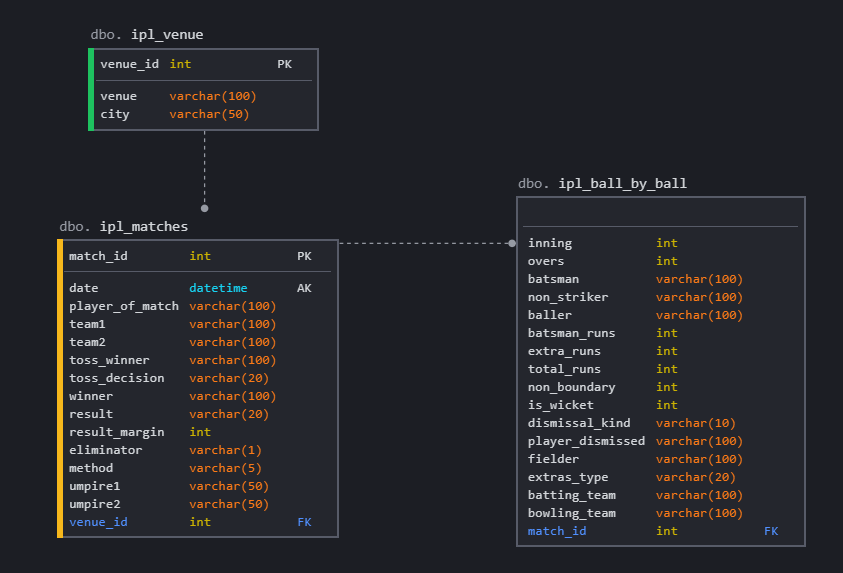

In [ ]:
cv2_imshow(img)

In [ ]:
df.printSchema()

root
 |-- match_id: string (nullable = true)
 |-- inning: string (nullable = true)
 |-- overs: string (nullable = true)
 |-- ball: string (nullable = true)
 |-- batsman: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- batsman_runs: string (nullable = true)
 |-- extra_runs: string (nullable = true)
 |-- total_runs: string (nullable = true)
 |-- non_boundary: string (nullable = true)
 |-- is_wicket: string (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- fielder: string (nullable = true)
 |-- extras_type: string (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)



In [ ]:
df2.printSchema()

root
 |-- match_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue_id: string (nullable = true)
 |-- neutral_venue: string (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- result: string (nullable = true)
 |-- result_margin: string (nullable = true)
 |-- eliminator: string (nullable = true)
 |-- method: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)



In [ ]:
df3.printSchema()

root
 |-- venue_id: string (nullable = true)
 |-- venue: string (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType
df = df.withColumn("is_wicket", df["is_wicket"].cast(IntegerType()))
df = df.withColumn("batsman_runs", df["batsman_runs"].cast(IntegerType()))
df = df.withColumn("extra_runs", df["extra_runs"].cast(IntegerType()))
df = df.withColumn("total_runs", df["total_runs"].cast(IntegerType()))
df = df.withColumn("inning", df["inning"].cast(IntegerType()))
df = df.withColumn("overs", df["overs"].cast(IntegerType()))
df = df.withColumn("non_boundary", df["non_boundary"].cast(IntegerType()))
df = df.withColumn("match_id", df["match_id"].cast(IntegerType()))

In [ ]:
df.summary().show(vertical=True)

-RECORD 0--------------------------------
 summary          | count                
 match_id         | 29325                
 inning           | 29325                
 overs            | 29325                
 ball             | 29325                
 batsman          | 29325                
 non_striker      | 29325                
 bowler           | 29325                
 batsman_runs     | 29325                
 extra_runs       | 29325                
 total_runs       | 29325                
 non_boundary     | 29325                
 is_wicket        | 29325                
 dismissal_kind   | 29325                
 player_dismissed | 29325                
 fielder          | 29325                
 extras_type      | 29325                
 batting_team     | 29325                
 bowling_team     | 29325                
-RECORD 1--------------------------------
 summary          | mean                 
 match_id         | 755862.5077919863    
 inning           | 1.475328218243

## DF2

In [ ]:
df2 = df2.withColumn("venue_id", df2["venue_id"].cast(IntegerType()))
df2 = df2.withColumn("result_margin", df2["result_margin"].cast(IntegerType()))

# DF3

In [ ]:
df3 = df3.withColumn("venue_id", df3["venue_id"].cast(IntegerType()))

# Lets check out if there are any nan values or missing data?

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

In [ ]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
df.show(vertical=True)

-RECORD 0--------------------------------
 match_id         | 419157               
 inning           | 2                    
 overs            | 16                   
 ball             | 4                    
 batsman          | V Kohli              
 non_striker      | R Vinay Kumar        
 bowler           | CRD Fernando         
 batsman_runs     | 0                    
 extra_runs       | 0                    
 total_runs       | 0                    
 non_boundary     | 0                    
 is_wicket        | 0                    
 dismissal_kind   | NA                   
 player_dismissed | NA                   
 fielder          | NA                   
 extras_type      | NA                   
 batting_team     | Royal Challengers... 
 bowling_team     | Mumbai Indians       
-RECORD 1--------------------------------
 match_id         | 419157               
 inning           | 2                    
 overs            | 16                   
 ball             | 5             

In [ ]:
df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df2.columns])
df2.show(vertical=True)

-RECORD 0-------------------------------
 match_id        | 335982               
 date            | 2008-04-18           
 player_of_match | BB McCullum          
 venue_id        | 35                   
 neutral_venue   | 0                    
 team1           | Royal Challengers... 
 team2           | Kolkata Knight Ri... 
 toss_winner     | Royal Challengers... 
 toss_decision   | field                
 winner          | Kolkata Knight Ri... 
 result          | runs                 
 result_margin   | 140                  
 eliminator      | N                    
 method          | NA                   
 umpire1         | Asad Rauf            
 umpire2         | RE Koertzen          
-RECORD 1-------------------------------
 match_id        | 335983               
 date            | 2008-04-19           
 player_of_match | MEK Hussey           
 venue_id        | 31                   
 neutral_venue   | 0                    
 team1           | Kings XI Punjab      
 team2          

In [ ]:
df3.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df3.columns]).show(vertical = True)
df3.show(vertical=True)

-RECORD 0-------
 venue_id | 0   
 venue    | 0   
 city     | 0   

-RECORD 0------------------------
 venue_id | 1                    
 venue    | Dr. Y.S. Rajasekh... 
 city     | Visakhapatnam        
-RECORD 1------------------------
 venue_id | 2                    
 venue    | Sharjah Cricket S... 
 city     | Sharjah              
-RECORD 2------------------------
 venue_id | 3                    
 venue    | JSCA Internationa... 
 city     | Ranchi               
-RECORD 3------------------------
 venue_id | 4                    
 venue    | Saurashtra Cricke... 
 city     | Rajkot               
-RECORD 4------------------------
 venue_id | 5                    
 venue    | Shaheed Veer Nara... 
 city     | Raipur               
-RECORD 5------------------------
 venue_id | 6                    
 venue    | Maharashtra Crick... 
 city     | Pune                 
-RECORD 6------------------------
 venue_id | 7                    
 venue    | Subrata Roy Sahar... 
 city     | P

# ANALYSIS

### 1. Find the top 3 venues which hosted the most number of eliminator matches?

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql import Row
from pyspark.sql.functions import sum as _sum
from pyspark.sql.functions import count as _count

In [ ]:
eli = df2.filter(df2.eliminator =='Y')
eli_ans = eli.groupBy('venue_id').count().sort('count',ascending=False)
eli_ans.show()

+--------+-----+
|venue_id|count|
+--------+-----+
|      25|    3|
|      38|    2|
|      27|    1|
|      22|    1|
|      35|    1|
|      37|    1|
|       4|    1|
|      29|    1|
|      33|    1|
|      14|    1|
+--------+-----+



In [ ]:
ans = df3.join(eli_ans,on='venue_id')
f_ans = ans.sort('count',ascending=False)
f_ans.show(3)

+--------+--------------------+---------+-----+
|venue_id|               venue|     city|count|
+--------+--------------------+---------+-----+
|      25|Dubai Internation...|    Dubai|    3|
|      38|Sheikh Zayed Stadium|Abu Dhabi|    2|
|      22|Rajiv Gandhi Inte...|Hyderabad|    1|
+--------+--------------------+---------+-----+
only showing top 3 rows



### 2. Return most number of catches taken by a player in IPL history?


In [ ]:
spark.sql(
"""
select fielder,count(*) from ipl_ball
where dismissal_kind == 'caught'
group by fielder
order by count(*) desc
"""
).show()

+--------------+--------+
|       fielder|count(1)|
+--------------+--------+
|      MS Dhoni|      24|
|     RG Sharma|      22|
|    RV Uthappa|      20|
|     AT Rayudu|      16|
|    KA Pollard|      15|
|      DJ Bravo|      14|
|    KD Karthik|      13|
|       WP Saha|      13|
|AB de Villiers|      12|
|      S Dhawan|      12|
|     RA Jadeja|      11|
|      PA Patel|      11|
|      SK Raina|      10|
|      SA Yadav|      10|
|     SV Samson|      10|
|     DA Warner|      10|
|   YV Takawale|       9|
|       NV Ojha|       9|
|       J Botha|       9|
|     MK Tiwary|       9|
+--------------+--------+
only showing top 20 rows



In [ ]:
ans2 = df.filter(df.dismissal_kind == "caught")
anss2 = ans2.groupBy('fielder').count().sort('count',ascending=False)
anss2.show()

+--------------+-----+
|       fielder|count|
+--------------+-----+
|      MS Dhoni|   24|
|     RG Sharma|   22|
|    RV Uthappa|   20|
|     AT Rayudu|   16|
|    KA Pollard|   15|
|      DJ Bravo|   14|
|       WP Saha|   13|
|    KD Karthik|   13|
|AB de Villiers|   12|
|      S Dhawan|   12|
|     RA Jadeja|   11|
|      PA Patel|   11|
|     SV Samson|   10|
|     DA Warner|   10|
|      SA Yadav|   10|
|      SK Raina|   10|
|     MK Tiwary|    9|
|     HH Pandya|    9|
|     JH Kallis|    9|
|       J Botha|    9|
+--------------+-----+
only showing top 20 rows



### 3. Write a query to return a report for highest wicket taker in matches which were affected by Duckworth-Lewis’s method (D/L method).


In [ ]:
ans3 = df2.filter(df2.method == 'D/L')
anss3 = ans3.groupBy('match_id').count()
anss3.show()

+--------+-----+
|match_id|count|
+--------+-----+
|  501245|    1|
|  829807|    1|
| 1136578|    1|
|  733993|    1|
|  392183|    1|
|  336025|    1|
| 1136566|    1|
|  392186|    1|
|  336022|    1|
|  980999|    1|
|  980989|    1|
| 1136592|    1|
|  829743|    1|
|  980997|    1|
|  980943|    1|
|  392214|    1|
|  501215|    1|
| 1082648|    1|
|  501255|    1|
+--------+-----+



In [ ]:
wicket = df.join(anss3,on='match_id')
wicket_ans = wicket.groupBy(['match_id','bowler']).sum('is_wicket')
wicket_ans.sort('sum(is_wicket)',ascending=False).show()

+--------+---------------+--------------+
|match_id|         bowler|sum(is_wicket)|
+--------+---------------+--------------+
|  336025|        M Ntini|             4|
| 1082648|NM Coulter-Nile|             3|
| 1082648|       UT Yadav|             2|
| 1082648|        B Kumar|             2|
|  829743|       M Morkel|             2|
|  336022|       JR Hopes|             2|
|  336022|       RR Powar|             2|
|  829743|      RS Bopara|             1|
| 1082648|      CJ Jordan|             1|
|  829743|   MC Henriques|             1|
|  336022|     GD McGrath|             1|
|  829743|        P Kumar|             1|
|  829743|     AD Russell|             1|
| 1082648|       TA Boult|             1|
|  336022|     PJ Sangwan|             1|
|  336022|       A Mishra|             1|
|  336025|       L Balaji|             1|
|  829743|        B Kumar|             1|
|  829743|       UT Yadav|             1|
| 1082648|      PP Chawla|             1|
+--------+---------------+--------

### 4. Write a query to return a report for highest strike rate by a batsman in non powerplay overs(7-20 overs) Note: strike rate = (Total Runs scored/Total balls faced by player) *100, Make sure that balls faced by players should be legal delivery (not wide balls or no balls).

In [ ]:
ans4 = df.filter((~df['extras_type'].isin(['wides', 'noballs']))& (df['overs'].between(7,20)))
runs=ans4.groupBy('batsman').sum('batsman_runs')
runs.show() 

+---------------+-----------------+
|        batsman|sum(batsman_runs)|
+---------------+-----------------+
|  Kuldeep Yadav|               17|
|     TM Dilshan|              115|
|     S Anirudha|               62|
|     KA Pollard|              487|
|        J Botha|              131|
|       DR Smith|              108|
|       M Manhas|               21|
|       AR Patel|              134|
|       SA Yadav|              203|
|          B Lee|                5|
|    BMAJ Mendis|                0|
|NM Coulter-Nile|               36|
|     AL Menaria|               23|
|       HV Patel|                6|
|      LPC Silva|               16|
|Joginder Sharma|               16|
|KB Arun Karthik|               24|
|      YK Pathan|              374|
|       RK Singh|                8|
|      RG Sharma|              572|
+---------------+-----------------+
only showing top 20 rows



In [ ]:
balls_faced=ans4.groupby('batsman').count()

balls_faced.show()

+---------------+-----+
|        batsman|count|
+---------------+-----+
|  Kuldeep Yadav|   17|
|     TM Dilshan|   84|
|     S Anirudha|   52|
|     KA Pollard|  282|
|        J Botha|   86|
|       DR Smith|   60|
|       M Manhas|   26|
|       AR Patel|  106|
|       SA Yadav|  152|
|          B Lee|    6|
|    BMAJ Mendis|    1|
|NM Coulter-Nile|   26|
|     AL Menaria|   17|
|       HV Patel|    3|
|      LPC Silva|   10|
|Joginder Sharma|    9|
|KB Arun Karthik|   25|
|      YK Pathan|  254|
|       RK Singh|   10|
|      RG Sharma|  376|
+---------------+-----+
only showing top 20 rows



In [ ]:
ans_4=balls_faced.join(runs,on="batsman", how="inner")
anss_4=ans_4.withColumn("Strike rate", col("sum(batsman_runs)")*100/col("count")).sort('Strike rate',ascending=False)
anss_4.select('batsman','Strike rate').show()

+-------------+------------------+
|      batsman|       Strike rate|
+-------------+------------------+
| Kamran Akmal|             300.0|
|  SW Billings|252.38095238095238|
|ST Jayasuriya| 241.1764705882353|
|     JD Ryder|             225.0|
|     Umar Gul|216.66666666666666|
| TU Deshpande|             200.0|
|   D Salunkhe|             200.0|
|      GB Hogg|             200.0|
|   AUK Pathan|             200.0|
|     HV Patel|             200.0|
|     M Morkel|191.66666666666666|
|      MS Gony|188.88888888888889|
|    JC Archer|187.09677419354838|
|     DJ Hooda|187.03703703703704|
|  LH Ferguson| 184.6153846153846|
|     V Sehwag|183.33333333333334|
|  Sunny Singh| 181.8181818181818|
|    SR Watson|  180.327868852459|
|   SD Chitnis|             180.0|
|    J Suchith|             180.0|
+-------------+------------------+
only showing top 20 rows



### 5. Write a query to return a report for highest extra runs in a venue (stadium, city).

In [ ]:
ans_5=df.groupby(['match_id']).sum('extra_runs').sort('sum(extra_runs)',ascending=False)
ans_5.show()

+--------+---------------+
|match_id|sum(extra_runs)|
+--------+---------------+
|  336028|             35|
|  829737|             33|
|  336023|             32|
|  336018|             28|
|  336015|             28|
|  336024|             27|
| 1082644|             25|
|  501200|             24|
|  419163|             24|
|  336016|             24|
|  336012|             24|
|  598004|             24|
| 1216522|             23|
|  419162|             23|
|  336009|             23|
|  597999|             23|
|  419165|             23|
|  501207|             22|
|  336026|             21|
|  336014|             21|
+--------+---------------+
only showing top 20 rows



In [ ]:
anss_5 = df2.join(ans_5,on='match_id').sort('sum(extra_runs)',ascending=False)
anss_5.show(5)

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+----------------+-------+-------------+----------+------+--------------+--------------+---------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|          winner| result|result_margin|eliminator|method|       umpire1|       umpire2|sum(extra_runs)|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+----------------+-------+-------------+----------+------+--------------+--------------+---------------+
|  336028|2008-05-21|       SE Marsh|      14|            0|      Mumbai Indians|     Kings XI Punjab|      Mumbai Indians|        field| Kings XI Punjab|   runs|            1|         N|    NA|     BF Bowden|GA Pratapkumar|             35|
|  829737|2015-04-19|Harbhajan Singh

In [ ]:
ansss_5 = df3.join(anss_5,on='venue_id').sort('sum(extra_runs)',ascending=False)
ansss_5.select('venue','city','sum(extra_runs)').show(10)

+--------------------+---------+---------------+
|               venue|     city|sum(extra_runs)|
+--------------------+---------+---------------+
|    Wankhede Stadium|   Mumbai|             35|
|M.Chinnaswamy Sta...|Bengaluru|             33|
|Sawai Mansingh St...|   Jaipur|             32|
|    Wankhede Stadium|   Mumbai|             28|
|Sawai Mansingh St...|   Jaipur|             28|
|Rajiv Gandhi Inte...|Hyderabad|             27|
|        Eden Gardens|  Kolkata|             25|
|M.Chinnaswamy Sta...|Bengaluru|             24|
|       Nehru Stadium|    Kochi|             24|
|Dr DY Patil Sport...|   Mumbai|             24|
+--------------------+---------+---------------+
only showing top 10 rows



### 6. Write a query to return a report for the cricketers with the most number of players of the match award in neutral venues.


In [ ]:
ans_6 = df2.filter(df2.neutral_venue == "1")
anss_6 = ans_6.groupBy('player_of_match').count().sort('count',ascending=False)
anss_6.show()

+----------------+-----+
| player_of_match|count|
+----------------+-----+
|       YK Pathan|    3|
|       JP Duminy|    3|
|      GJ Maxwell|    3|
|       JH Kallis|    3|
|  Sandeep Sharma|    2|
|       ML Hayden|    2|
|       RG Sharma|    2|
|    SR Tendulkar|    2|
|        DR Smith|    2|
|    Yuvraj Singh|    2|
|   KC Sangakkara|    2|
|DPMD Jayawardene|    2|
|  M Muralitharan|    2|
|     LRPL Taylor|    2|
|       MK Pandey|    2|
|        SK Raina|    2|
|  AB de Villiers|    2|
|    AC Gilchrist|    2|
|         M Vijay|    1|
|        R Dravid|    1|
+----------------+-----+
only showing top 20 rows



In [ ]:
spark.sql(
"""
select player_of_match,count(*) from ipl_matches
where neutral_venue = 1
group by player_of_match
order by count(*) desc 
""").show()

+----------------+--------+
| player_of_match|count(1)|
+----------------+--------+
|       JP Duminy|       3|
|      GJ Maxwell|       3|
|       JH Kallis|       3|
|       YK Pathan|       3|
|       ML Hayden|       2|
|       MK Pandey|       2|
|    Yuvraj Singh|       2|
|  M Muralitharan|       2|
|       RG Sharma|       2|
|        SK Raina|       2|
|     LRPL Taylor|       2|
|DPMD Jayawardene|       2|
|  Sandeep Sharma|       2|
|   KC Sangakkara|       2|
|    SR Tendulkar|       2|
|        DR Smith|       2|
|  AB de Villiers|       2|
|    AC Gilchrist|       2|
|        V Sehwag|       1|
|        GC Smith|       1|
+----------------+--------+
only showing top 20 rows



### 7. Write a query to get a list of top 10 players with the highest batting average Note: Batting average is the total number of runs scored divided by the number of times they have been out (Make sure to include run outs (on non-striker end) as valid out while calculating average).

In [ ]:
player_dismissed=df.groupby('player_dismissed').count()
total_runs=df.groupBy('batsman').sum('batsman_runs')
ans_7=player_dismissed.join(total_runs, player_dismissed.player_dismissed == total_runs.batsman, 'inner') 

In [ ]:
anss_7=ans_7.withColumn("Batsmen Avg", col("sum(batsman_runs)")/col("count")).sort('Batsmen Avg',ascending=False)
anss_7.select('batsman','Batsmen Avg').show(10)

+-------------+------------------+
|      batsman|       Batsmen Avg|
+-------------+------------------+
|LA Pomersbach|             152.0|
|  PC Valthaty|             126.0|
|ST Jayasuriya|              94.0|
|      HM Amla|              92.0|
|      TM Head|              77.0|
|  Niraj Patel|              61.0|
|    SS Tiwary|             60.75|
|    V Shankar|57.333333333333336|
|     KL Rahul|56.111111111111114|
|  SW Billings|              53.0|
+-------------+------------------+
only showing top 10 rows



### 8. Write a query to find out who has officiated (as an umpire) the most number of matches in IPL.


In [ ]:
spark.sql(
"""
select umpire, count(*)
from ((select umpire1 as umpire from ipl_matches) union all
      (select umpire2 from ipl_matches)
     ) ipl_matches
group by umpire
order by count(*) desc ;
""").show()

+--------------------+--------+
|              umpire|count(1)|
+--------------------+--------+
|              S Ravi|     121|
|     HDPK Dharmasena|      94|
|        AK Chaudhary|      87|
|       C Shamshuddin|      82|
|           M Erasmus|      65|
|         Nitin Menon|      57|
|           CK Nandan|      57|
|          SJA Taufel|      55|
|           Asad Rauf|      51|
|         VA Kulkarni|      50|
|        BNJ Oxenford|      48|
|         CB Gaffaney|      47|
|           RJ Tucker|      46|
|         BR Doctrove|      42|
|         RE Koertzen|      41|
|           Aleem Dar|      38|
|           BF Bowden|      37|
|            NJ Llong|      37|
|KN Ananthapadmana...|      33|
|      RK Illingworth|      31|
+--------------------+--------+
only showing top 20 rows



### 9. Find venue details of the match where V Kohli scored his highest individual runs in IPL.


In [ ]:
ans_8 = df.filter(df.batsman == 'V Kohli')
ans_8.sort('match_id',ascending = False).show(100)

+--------+------+-----+----+-------+-----------------+------------+------------+----------+----------+------------+---------+--------------+----------------+---------+-----------+--------------------+-------------------+
|match_id|inning|overs|ball|batsman|      non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|  fielder|extras_type|        batting_team|       bowling_team|
+--------+------+-----+----+-------+-----------------+------------+------------+----------+----------+------------+---------+--------------+----------------+---------+-----------+--------------------+-------------------+
| 1216525|     1|    4|   4|V Kohli|       D Padikkal|   DL Chahar|           0|         0|         0|           0|        0|            NA|              NA|       NA|         NA|Royal Challengers...|Chennai Super Kings|
| 1216525|     1|    4|   5|V Kohli|       D Padikkal|   DL Chahar|           1|         0|         1|           0| 

In [ ]:
anss_8 = ans_8.groupby(['match_id']).sum('batsman_runs').sort('sum(batsman_runs)',ascending=False)
anss_8.show()

+--------+-----------------+
|match_id|sum(batsman_runs)|
+--------+-----------------+
| 1216514|               72|
|  829749|               62|
| 1082646|               58|
|  598012|               58|
|  829745|               51|
|  598004|               46|
| 1216525|               44|
| 1216519|               43|
| 1216522|               43|
|  598008|               35|
|  829757|               35|
|  829771|               34|
| 1136563|               31|
| 1216505|               29|
|  419157|               27|
|  501200|               23|
| 1136571|               22|
|  336016|               21|
|  829737|               18|
|  597999|               18|
+--------+-----------------+
only showing top 20 rows



In [ ]:
ansss_8 = df2.join(anss_8,on='match_id')
anssss_8 = df3.join(ansss_8,on = 'venue_id')
anssss_8 = anssss_8.withColumnRenamed("sum(batsman_runs)","V_Kohli(highest runs)")
anssss_8.select('venue_id','venue','V_Kohli(highest runs)').sort('V_Kohli(highest runs)',ascending=False).show(1)

+--------+--------------------+---------------------+
|venue_id|               venue|V_Kohli(highest runs)|
+--------+--------------------+---------------------+
|      38|Sheikh Zayed Stadium|                   72|
+--------+--------------------+---------------------+
only showing top 1 row



In [ ]:
ans = df3.join(eli_ans,on='venue_id')
f_ans = ans.sort('count',ascending=False)
f_ans.show(3)

+--------+--------------------+---------+-----+
|venue_id|               venue|     city|count|
+--------+--------------------+---------+-----+
|      25|Dubai Internation...|    Dubai|    3|
|      38|Sheikh Zayed Stadium|Abu Dhabi|    2|
|      27|    Feroz Shah Kotla|    Delhi|    1|
+--------+--------------------+---------+-----+
only showing top 3 rows



In [ ]:
eli = df2.filter(df2.eliminator =='Y')
eli_ans = eli.groupBy('venue_id').count().sort('count',ascending=False)
eli_ans.show()

+--------+-----+
|venue_id|count|
+--------+-----+
|      25|    3|
|      38|    2|
|      22|    1|
|      27|    1|
|      35|    1|
|      37|    1|
|       4|    1|
|      29|    1|
|      33|    1|
|      14|    1|
+--------+-----+



### 10. Creative Case study:
### Please analyze how winning/losing tosses can impact a match and it's result? (Marks for Visualization also)

In [ ]:
team = ['Sunrisers Hyderabad','Chennai Super Kings','Rising Pune Supergiant','Deccan Chargers','Kochi Tuskers Kerala','Rajasthan Royals','Gujarat Lions','Royal Challengers Bangalore','Kolkata Knight Riders','Rising Pune Supergiants','Kings XI Punjab','Pune Warriors','Delhi Daredevils','Delhi Capitals','Mumbai Indians']
team

['Sunrisers Hyderabad',
 'Chennai Super Kings',
 'Rising Pune Supergiant',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Rajasthan Royals',
 'Gujarat Lions',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Rising Pune Supergiants',
 'Kings XI Punjab',
 'Pune Warriors',
 'Delhi Daredevils',
 'Delhi Capitals',
 'Mumbai Indians']

In [ ]:
win_toss_win_match = []
win_toss_lost_match = []

In [ ]:
def win_toss_match(df,x):
  y1 = df.filter((df.toss_winner == x) & (df.winner == x))
  return y1.count()

In [ ]:
def lost_toss_match(df,x):
  y2 = df.filter((df.toss_winner == x) & (df.winner != x))
  return y2.count()

In [ ]:
for i in range(0,len(team)):
  a = win_toss_match(df2,team[i])
  b = lost_toss_match(df2,team[i])
  win_toss_win_match.append(a)
  win_toss_lost_match.append(b)

In [ ]:
win_toss_win_match

[29, 61, 5, 19, 4, 44, 10, 43, 55, 3, 36, 3, 35, 10, 61]

In [ ]:
win_toss_lost_match

[28, 36, 1, 24, 4, 43, 5, 44, 43, 4, 49, 17, 45, 10, 45]

In [ ]:
import pandas as pd
result = pd.DataFrame(list(zip(team,win_toss_win_match,win_toss_lost_match)),columns = ['Teams','win_toss_win_match','win_toss_lost_match'])
result

,Teams,win_toss_win_match,win_toss_lost_match
0,Sunrisers Hyderabad,29,28
1,Chennai Super Kings,61,36
2,Rising Pune Supergiant,5,1
3,Deccan Chargers,19,24
4,Kochi Tuskers Kerala,4,4
5,Rajasthan Royals,44,43
6,Gujarat Lions,10,5
7,Royal Challengers Bangalore,43,44
8,Kolkata Knight Riders,55,43
9,Rising Pune Supergiants,3,4


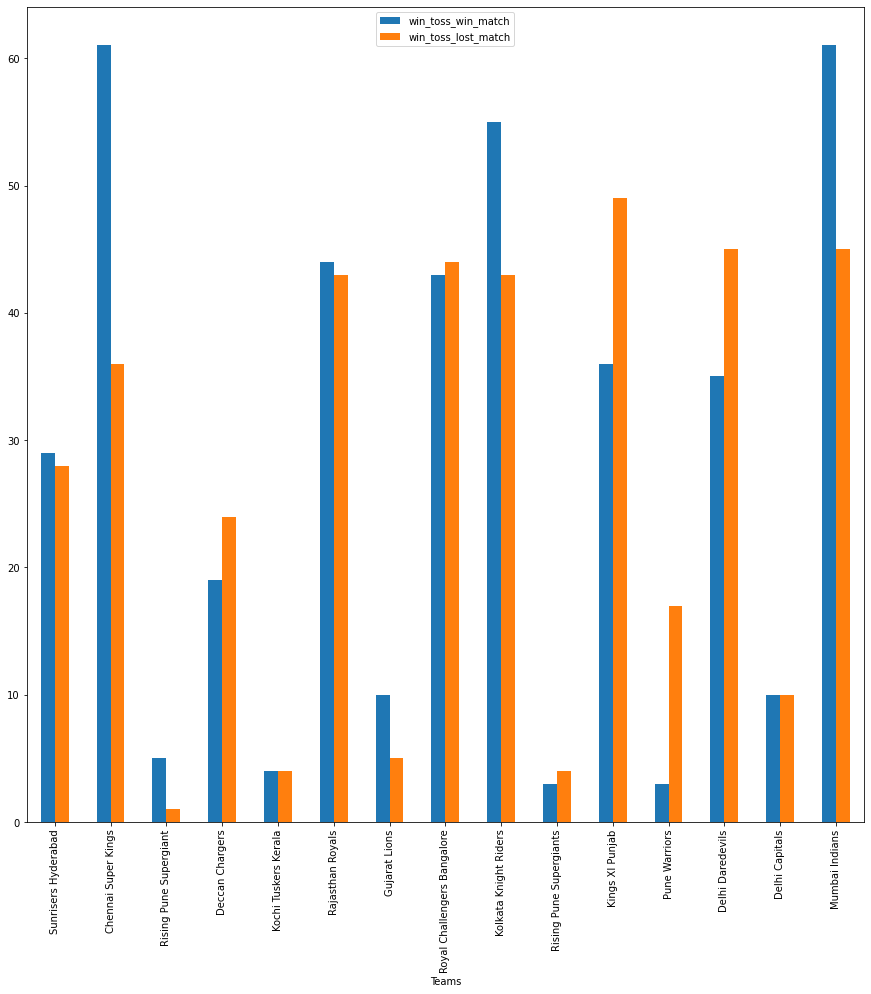

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt


result.plot(x="Teams", y=["win_toss_win_match", "win_toss_lost_match"], kind="bar", figsize=(15, 15))


## NOTE:- So in total `7 teams` are such which have won more number of matches after winning the toss while `2 teams` have a equal score of wins having no impact of toss in there performances while the remaining `6 teams` have won there most matches after losing the toss

## Note:- There is a bit `error` in the dataset having typo in classifying team Rising Pune SuperGiants as the dataset consist `Rising Pune SuperGiants` and `Rising Pune SuperGiant`

# SECTION 3

## 1. Create a database (use any relational DB preferably SQLite) and load data from the dataset (Section 1) into db.
2. Create a Class Database. Class will need to have
1. Constructor to initialize dB connection and other variables
2. Methods implemented to return result-set for each query in Section 2, result-set should
be returned as a json/dict object.
3. Exception handling.
4. get_status method to ping database connectivity

In [ ]:
import json
import sqlite3
class Database(object):

    """
        SQLite3  Data query helper classes 
    """

    def __init__(self, filename):
        """
             A constructor 
             parameter : filename  for SQLite3  Database file name 
        """
        self.file_name = filename

    def open(self):
        """
             Open the database and set the cursor 
        """
        self.connection = sqlite3.connect(self.file_name)
        self.cursor = self.connection.cursor()

    def add(self,df,x):

      df.to_sql(x,self.connection,if_exists = 'replace',index=False)


    def close(self):
        """
             Close the database, note that if you do not explicitly call this method, 
             It is also attempted when the class is reclaimed 
        """
        if hasattr(self, "connection") and self.connection:
            self.connection.close()

    def __del__(self):
        """
             Destruct method, do some cleanup 
        """
        self.close()

    def commit(self):
        """
             Commit the transaction 
            SELECT Statement does not require this action, by default execute methods 
            commit_at_once Set to True It implicitly calls this method, 
             Otherwise you need to show that this method is called. 
        """
        self.connection.commit()

    def execute(self, sql = None, commit_at_once = True):
        """
             perform SQL statements 
             parameter :
                sql   To perform the SQL Statement, if is None , which is generated by the constructor SQL Statements. 
                commit_at_once  Whether to commit the transaction immediately, if not immediately, 
                 For non-query operations, the call is required commit Explicitly submit. 
        """
        if not sql:
            sql = self.sql
        self.cursor.execute(sql)
        if commit_at_once:
            self.commit()

    def fetchone(self, sql = None):
        """
             Take a record 
        """
        self.execute(sql, False)
        return self.cursor.fetchone()

    def get_query1_result(self, sql = None):
        """
             Take all records 
        """
        self.execute(sql, False)
        return json.dumps(self.cursor.fetchall())


    def get_status(self):
     try:
        self.connection.cursor()
        return True
     except Exception as ex:
        return False

In [ ]:
dff = df.toPandas()
dff2 = df2.toPandas()
dff3 = df3.toPandas()

In [ ]:
db = Database('db.db')
db.open()
db.add(dff,'ipl_balls')
db.add(dff2,'ipl_matches')
db.add(dff3,'ipl_venues')

Exception ignored in: <function Database.__del__ at 0x7fa894296cb0>
Traceback (most recent call last):
  File "<ipython-input-196-18f117c343db>", line 41, in __del__
  File "<ipython-input-196-18f117c343db>", line 35, in close
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140362826880896 and this is thread id 140362399078144.


In [ ]:
qry1_result = db.get_query1_result(sql = """
select fielder,count(*) from ipl_balls
where dismissal_kind == 'caught'
group by fielder
order by count(*) desc
""")
qry1_result

'[["MS Dhoni", 24], ["RG Sharma", 22], ["RV Uthappa", 20], ["AT Rayudu", 16], ["KA Pollard", 15], ["DJ Bravo", 14], ["KD Karthik", 13], ["WP Saha", 13], ["AB de Villiers", 12], ["S Dhawan", 12], ["PA Patel", 11], ["RA Jadeja", 11], ["DA Warner", 10], ["SA Yadav", 10], ["SK Raina", 10], ["SV Samson", 10], ["HH Pandya", 9], ["J Botha", 9], ["JH Kallis", 9], ["MK Tiwary", 9], ["NV Ojha", 9], ["YV Takawale", 9], ["AC Gilchrist", 8], ["CL White", 8], ["F du Plessis", 8], ["KM Jadhav", 8], ["M Vijay", 8], ["SPD Smith", 8], ["AM Rahane", 7], ["DR Smith", 7], ["Q de Kock", 7], ["R Vinay Kumar", 7], ["SS Tiwary", 7], ["YK Pathan", 7], ["AD Russell", 6], ["AR Patel", 6], ["M Kartik", 6], ["MA Agarwal", 6], ["V Kohli", 6], ["AJ Finch", 5], ["BA Stokes", 5], ["DPMD Jayawardene", 5], ["DT Christian", 5], ["G Gambhir", 5], ["KC Sangakkara", 5], ["KL Rahul", 5], ["M Rawat", 5], ["MK Pandey", 5], ["RP Singh", 5], ["RR Pant", 5], ["S Nadeem", 5], ["SC Ganguly", 5], ["SR Tendulkar", 5], ["UT Yadav", 5],

In [ ]:
db.get_status()

True